In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_cash = pd.read_csv('project_dataset/extract - cash request - data analyst.csv')
df_fees = pd.read_csv('project_dataset/extract - fees - data analyst - .csv')

In [4]:
df_cash.info()
#Observamos que tendremos que castear algunos tipos de variables, como las fechas.
#Investigar porque los id aparecen como float y no como integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

<Axes: xlabel='amount', ylabel='Count'>

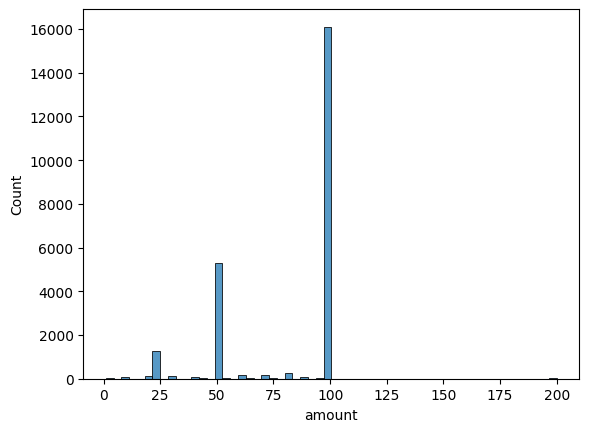

In [7]:
#Generamos un histograma para conocer la distribución de los ingresos
sns.histplot(x=df_cash.amount)

<Axes: xlabel='status', ylabel='Count'>

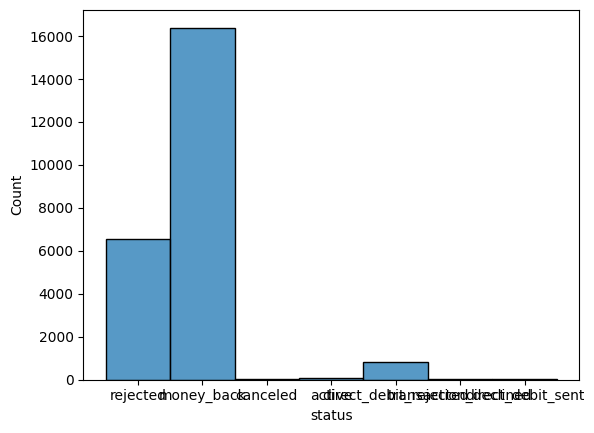

In [10]:
sns.histplot(x=df_cash.status)

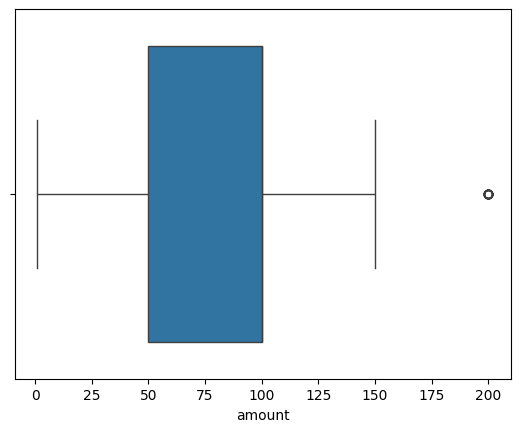

In [8]:
sns.boxplot(x="amount", data=df_cash)

status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64


<Axes: title={'center': 'Número de CR por status'}, xlabel='status'>

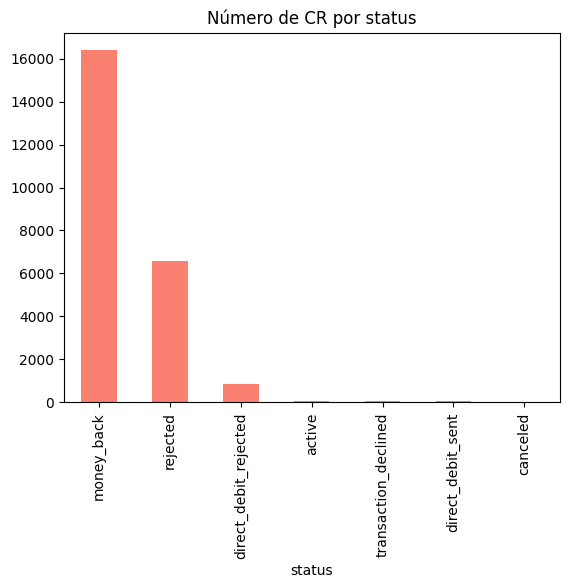

In [18]:
# Contamos el total de Cash Requests por status
status_count = df_cash["status"].value_counts()
print(status_count)
status_count.plot(kind="bar", color="salmon", title="Número de CR por status")

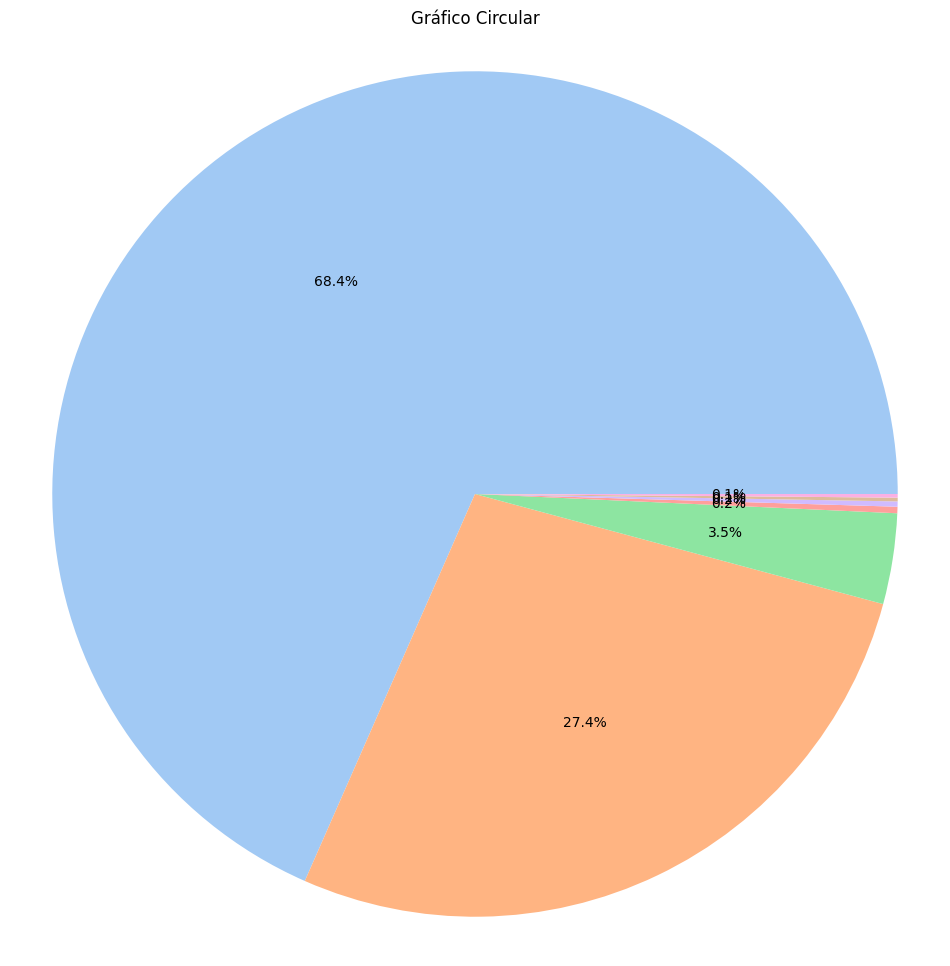

In [27]:
plt.figure(figsize=(12, 12))
sns.set_palette("pastel")
plt.pie(status_count, autopct='%1.1f%%')
plt.title('Gráfico Circular')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.show()

transfer_type
instant    13882
regular    10088
Name: count, dtype: int64


<Axes: title={'center': 'Número de CR por tipo de transferencia'}, xlabel='transfer_type'>

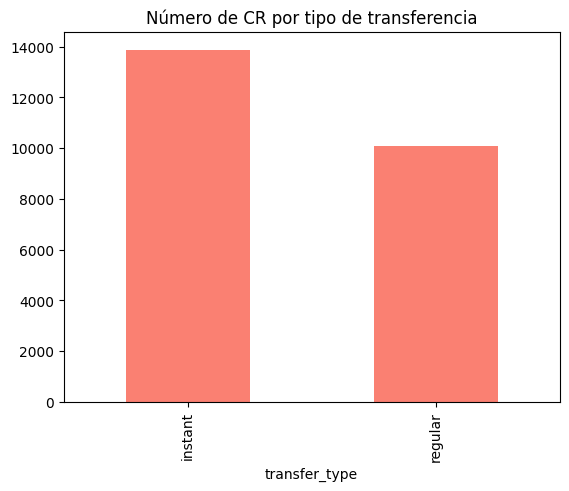

In [19]:
type_count = df_cash["transfer_type"].value_counts()
print(type_count)
type_count.plot(kind="bar", color="salmon", title="Número de CR por tipo de transferencia")

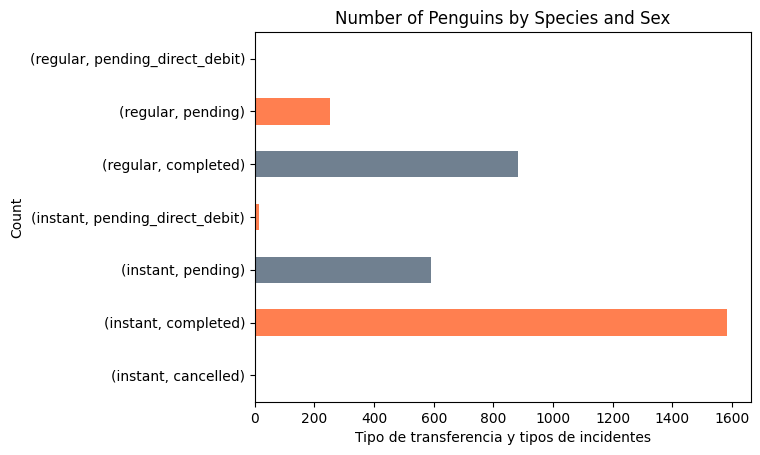

In [22]:
df_cash.groupby(["transfer_type", "recovery_status"])["recovery_status"].count().plot(kind="barh",color=["slategray", "coral"])
#convertir el recovery status en 0 y 1 si ha tenido incidente o no.

# Adding a title to the bar chart
plt.title('Number of Penguins by Species and Sex')

# Labeling the x-axis
plt.xlabel('Tipo de transferencia y tipos de incidentes')

# Labeling the y-axis
plt.ylabel('Count')

# Displaying the bar chart
plt.show()

In [6]:
df_fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


type
instant_payment    11099
postpone            7766
incident            2196
Name: count, dtype: int64


<Axes: title={'center': 'Número de fees por tipo'}, xlabel='type'>

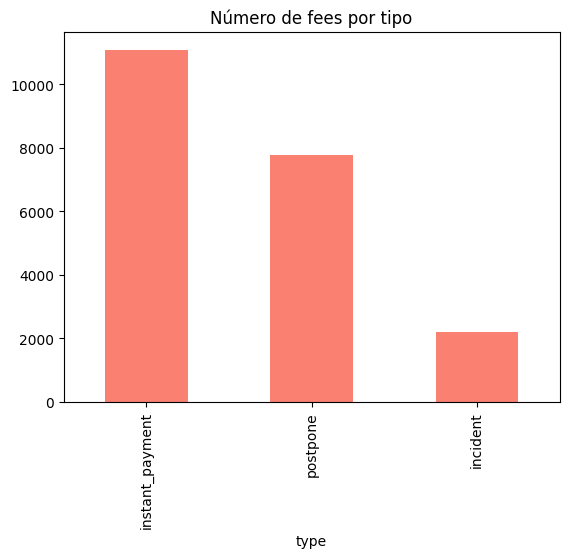

In [23]:
fee_type_count = df_fees["type"].value_counts()
print(fee_type_count)
fee_type_count.plot(kind="bar", color="salmon", title="Número de fees por tipo")